<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#fff;" align="center">Automatically classify consumer goods - P6</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">| Notebook - Convolutional Neural Networks |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div class="alert alert-block alert-info">
    <p>In this notebook, we are going to do the image classification through Convolutional Neural Networks - CNN through Transfer Learning</p>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [23]:
## General
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

## TensorFlow
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Scikit Learn 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, confusion_matrix, accuracy_score, classification_report

## Own specific functions 
from functions import *

## Images paths
THUMBNAILS_IMAGES_PATH  = "images/Flipkart/thumbnails/"

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files and Initial analysis</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to load the dateset to have data to compare the results
</div>

In [2]:
df_data = pd.read_csv(r"datasets\df_data.csv", index_col=[0])

In [3]:
df_data = df_data[["image", "category_1"]].copy()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.2. Initial analysis</h3>
</div>

In [4]:
df_analysis(df_data, "df_data", analysis_type="complete")


Analysis Header of df_data dataset
--------------------------------------------------------------------------------
- Dataset shape:			 1050 rows and 2 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 24.6+ KB

Detailed analysis of df_data dataset
----------------------------------------------------------------------


,name,type,records,unique
0,image,object,1050,1050
1,category_1,object,1050,7


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Convolutional Neural Networks - VGG16</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Setup the model</h3>
</div>

In [5]:
model = VGG16(weights="imagenet", include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Feature extraction</h3>
</div>

In [6]:
vgg16_feature_list = []

for ind in df_data.index:
    
    # loading images
    image = load_img(THUMBNAILS_IMAGES_PATH + 
                     df_data["image"][ind],
                     target_size=(224, 224))
    
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    
    vgg16_feature = model.predict(image)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

vgg16_feature_list_np = np.array(vgg16_feature_list)

<div class="alert alert-block alert-info">
    <p>Let's see the result</p>
</div>

In [7]:
df_data["VGG16"] = ""

for ind in df_data.index:
    df_data["VGG16"][ind] = vgg16_feature_list_np[ind]

df_data.head()   

,image,category_1,VGG16
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 5.1787353, 2.0781233, 0.0..."
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,"[0.0, 0.0, 2.3744545, 0.0, 0.0, 0.0, 0.0, 0.0,..."


<div class="alert alert-block alert-info">
    <p>Now, let's create the BoVW based on the result</p>
</div>

In [8]:
df_VGG16 = np.column_stack(df_data["VGG16"].values.tolist())
df_VGG16 = pd.DataFrame(df_VGG16).T
df_VGG16.head()

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.0,0.000000,0.0,5.178735,2.078123,0.0,0.0,0.0,0.0,...,17.991507,54.55431,0.0,0.0,0.00000,18.228214,1.754302,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,4.398548,0.0
4,0.0,0.0,2.374454,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,14.970797,0.00000,0.0,0.0,38.98354,0.000000,29.082623,0.0,0.000000,0.0


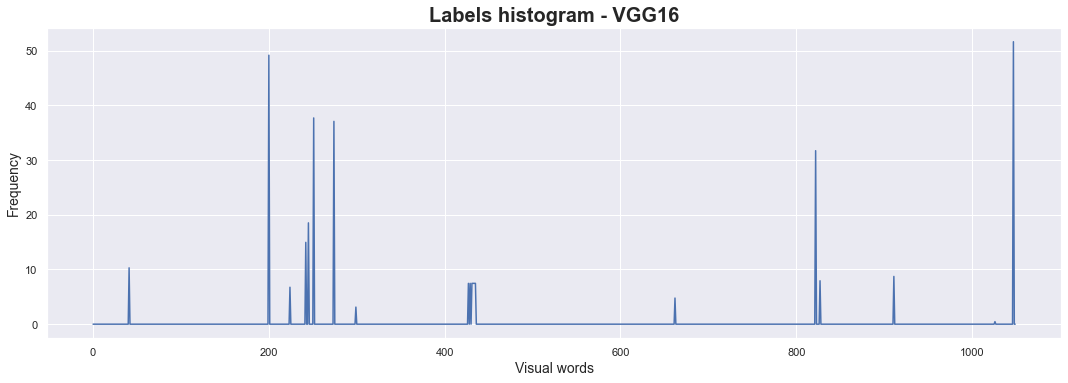

In [9]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(311)

ax.set_title("Labels histogram - VGG16", size=20, fontweight="bold")
ax.set_xlabel("Visual words", size=14)
ax.set_ylabel("Frequency", size=14)

ax.plot(df_VGG16[1].ravel())

plt.tight_layout()
plt.show()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.3. PCA and T-SNE dimension reduction</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's look at the dataset shape before doing the PCA </p>
</div>

In [10]:
print("Dataset shape: " + str(df_VGG16.shape[0]) + " rows and " + 
      str(df_VGG16.shape[1]) + " columns")

Dataset shape: 1050 rows and 25088 columns


<div class="alert alert-block alert-info">
    <p>Next, we are going to do the PCA </p>
</div>

In [11]:
pca = PCA(n_components=0.80)
VGG16_pca = pca.fit_transform(df_VGG16)

<div class="alert alert-block alert-info">
    <p>Let's look at the dataset shape again </p>
</div>

In [12]:
VGG16_pca.shape

(1050, 392)

<div class="alert alert-block alert-info">
    <p>Before doing the T-SNE, we are going to <b>Encode</b> through LabelEncoder the first level of the tree categories </p>
</div>

In [13]:
le = LabelEncoder()
df_data["category_encode"] =df_data[["category_1"]].apply(le.fit_transform)
df_data[["category_1", "category_encode"]].head()

,category_1,category_encode
0,Home Furnishing,4
1,Baby Care,0
2,Baby Care,0
3,Home Furnishing,4
4,Home Furnishing,4


<div class="alert alert-block alert-info">
    <p>Let's reduced the dimension through T-SNE</p>
</div>

In [14]:
tsne = TSNE(n_components=2, perplexity=30,
            n_iter=2000, init="random",
            random_state=6, learning_rate="auto")

X_tsne = tsne.fit_transform(VGG16_pca)

VGG16_pca_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
VGG16_pca_tsne["class_encode"] = df_data["category_encode"]
VGG16_pca_tsne["class"] = df_data["category_1"]

VGG16_pca_tsne.head()

,tsne1,tsne2,class_encode,class
0,8.734866,13.773518,4,Home Furnishing
1,-1.600265,-10.065642,0,Baby Care
2,9.467382,-6.931741,0,Baby Care
3,14.233299,0.066385,4,Home Furnishing
4,4.991502,19.435167,4,Home Furnishing


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.4. Clusterization</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.1. KMeans</h4>
</div>

<div class="alert alert-block alert-info">
    <p>The number of cluster based on the first level of the tree categories</p>
</div>

In [15]:
n_clusters = df_data["category_1"].nunique()

<div class="alert alert-block alert-info">
    <p>Let's do the clusterization</p>
</div>

In [16]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,
                max_iter=1000, random_state=10)

cluster_labels = kmeans.fit_predict(VGG16_pca_tsne[["tsne1", "tsne2"]])
VGG16_pca_tsne["cluster"] = cluster_labels

# Calculating ARI based on the first level of the tree categories
ari = adjusted_rand_score(VGG16_pca_tsne["class_encode"], VGG16_pca_tsne["cluster"])

In [17]:
print("ARI score: " + str(round(ari, 3)))

ARI score: 0.331


<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.2. Visual analysis</h4>
</div>

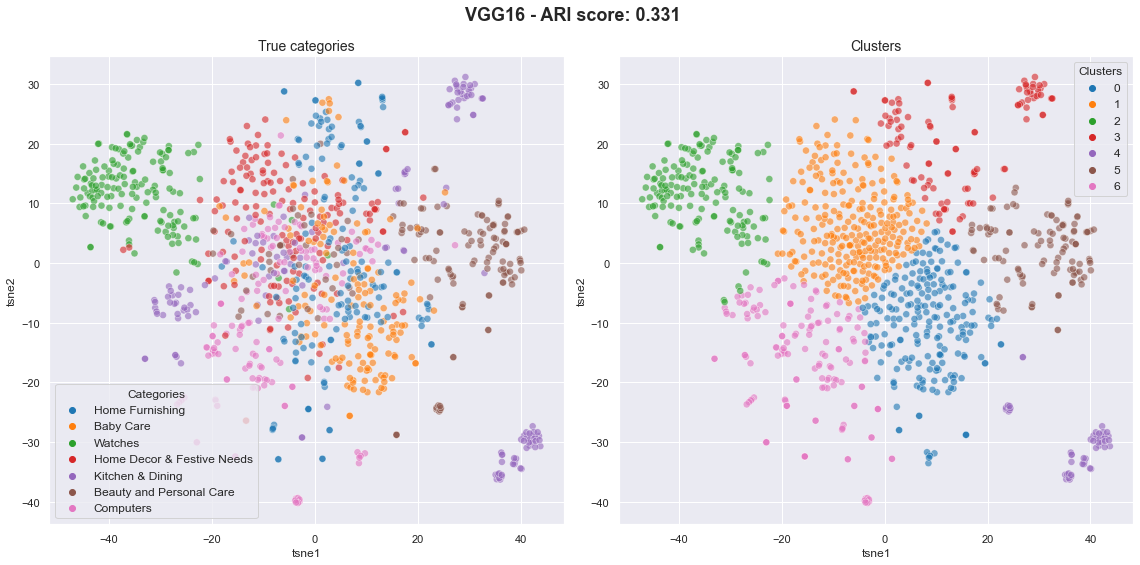

In [19]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16, 8))
fig.suptitle(" VGG16 - ARI score: " + str(round(ari, 3)),
             fontsize=18, fontweight="bold")    

sns.scatterplot(ax=axes[0], x="tsne1", y="tsne2", hue="class", 
                data=VGG16_pca_tsne, legend="brief",
                palette=sns.color_palette("tab10", n_colors=7),
                s=50, alpha=0.6)
axes[0].legend(loc="best", prop={"size": 12},
          title="Categories")
axes[0].set_title("True categories", fontsize=14)

sns.scatterplot(ax=axes[1], x="tsne1", y="tsne2", hue="cluster", 
                data=VGG16_pca_tsne, legend="brief",
                palette=sns.color_palette("tab10", n_colors=7),
                s=50, alpha=0.6)
axes[1].legend(loc="best", prop={"size": 12},
          title="Clusters")
axes[1].set_title("Clusters", fontsize=14)

plt.tight_layout()
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.3. Confusion matrix</h4>
</div>

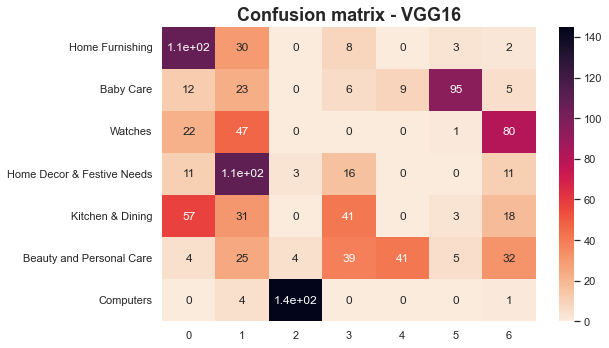

 >> ARI score:				0.331
 >> Accuracy classification score:	14.48
 >> Classification report
              precision    recall  f1-score   support

           0       0.50      0.71      0.59       150
           1       0.09      0.15      0.11       150
           2       0.00      0.00      0.00       150
           3       0.15      0.11      0.12       150
           4       0.00      0.00      0.00       150
           5       0.05      0.03      0.04       150
           6       0.01      0.01      0.01       150

    accuracy                           0.14      1050
   macro avg       0.11      0.14      0.12      1050
weighted avg       0.11      0.14      0.12      1050

--------------------------------------------------------------------------------




In [25]:
df_matrix = confusion_matrix(VGG16_pca_tsne["class_encode"],
                             VGG16_pca_tsne["cluster"])

df_matrix = pd.DataFrame(df_matrix, index=[class_encode for class_encode in VGG16_pca_tsne["class"].unique().tolist()],
                         columns=range(len(VGG16_pca_tsne["class"].unique())))

plt.figure(figsize = (9, 5))
plt.title("Confusion matrix - VGG16",
         fontsize=18, fontweight="bold")  
sns.heatmap(df_matrix, annot=True, cmap="rocket_r")

plt.tight_layout()
plt.show()

print(" >> ARI score:\t\t\t\t" + str(round(ari, 3)))
print(" >> Accuracy classification score:\t" + str(round(accuracy_score(VGG16_pca_tsne["class_encode"],
                                                                        VGG16_pca_tsne["cluster"])*100, 2)))

print(" >> Classification report")
print(classification_report(VGG16_pca_tsne["class_encode"], VGG16_pca_tsne["cluster"]))
print("-"*80)
print("\n")